## 소개
### 1.배경
#### 다양한 장비/서비스에서 일어나는 시스템 데이터를 통해 사용자의 불편을 예지하기 위해 ‘시스템 데이터’와 ‘사용자 불편 발생 데이터’를 분석하여 불편을 느낀 사용자와 불편 요인들을 찾아주세요.
### 2.목적
#### 데이터를 통해 사용자가 불편을 느끼는 원인 분석

분류/회귀 중 어떤 문제인지 햇갈렸는데, 0과 1사이의 확률을 예측하여 발생 할지, 말지를 예측하는 **분류** 문제였습니다.

## 데이터셋에 대한 설명

### 학습 데이터 (user_id : 10000 ~ 24999, 15000명)


			train_quality_data.csv : 시스템 퀄리티 로그

			train_problem_data.csv : 사용자 불만 및 불만이 접수된 시간

			train_err_data.csv : 시스템에 발생한 에러 로그



### 테스트 데이터(user_id : 30000 ~ 44998, 14999명)


			test_quality_data.csv : 시스템 퀄리티 로그

			test_err_data.csv : 시스템에 발생한 에러 로그

			sample_submission.csv : 사용자 불만 확률(0~1) (제출용)

## 컬럼별 설명
#### train_quality_data
- time : 로그발생시간 
- user_id : 사용자ID
- fwver : 펌웨어버전
- quality_0 ~ quality_12 : 번호가 매겨진 각 퀄리티  
---
#### train_problem_data
- user_id : 사용자ID
- time : 불만접수시간
---
#### train_err_data
- user_id : 사용자ID
- time : 로그발생시간
- model_nm : 모델명
- fwver : 펌웨어버전
- errtype : 에러타입
- errcode : 에러코드
---


# EDA

In [8]:
# 기본 모듈 import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [9]:
# path 지정
base_path = "/content/drive/MyDrive/Colab Notebooks/data/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/convert/"
save_path = "/content/drive/MyDrive/Colab Notebooks/data/235687_시스템 품질 변화로 인한 사용자 불편 예지 AI 경진대회_data/result/"

In [10]:
# train data 불러오기
train_quality = pd.read_csv(base_path+'train_quality_data_.csv')
train_problem = pd.read_csv(base_path+'train_problem_data_.csv')
train_error = pd.read_csv(base_path+'train_err_data_.csv')
test_quality = pd.read_csv(base_path+'test_quality_data_.csv')
test_error = pd.read_csv(base_path+'test_err_data_.csv')

### csv 파일은 전부 time column을 to_datetime 처리한 파일입니다.

### Train Data 파일이 3개??
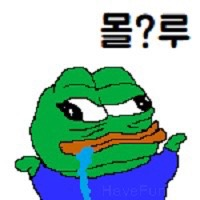    왜????

## quaulity data 확인해보기

In [ ]:
train_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828624 entries, 0 to 828623
Data columns (total 17 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  828624 non-null  int64  
 1   time        828624 non-null  object 
 2   user_id     828624 non-null  int64  
 3   fwver       788544 non-null  object 
 4   quality_0   684192 non-null  float64
 5   quality_1   828624 non-null  int64  
 6   quality_2   788511 non-null  float64
 7   quality_3   828624 non-null  int64  
 8   quality_4   828624 non-null  int64  
 9   quality_5   828604 non-null  object 
 10  quality_6   828624 non-null  int64  
 11  quality_7   828624 non-null  object 
 12  quality_8   828624 non-null  object 
 13  quality_9   828624 non-null  object 
 14  quality_10  828624 non-null  object 
 15  quality_11  828624 non-null  int64  
 16  quality_12  828624 non-null  int64  
dtypes: float64(2), int64(8), object(7)
memory usage: 107.5+ MB


### 총 828624행

#### quality에서 전처리 해줘야할 컬럼
fwver : 05.15.2138 과 같이 되어있음 (object)  
quality_5, 7,8,9,10 : object

In [ ]:
train_quality.head(10)

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,1,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,2,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,3,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,4,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
5,5,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
6,6,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,4,0,0,0,0,4,0,0
7,7,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
8,8,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
9,9,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [ ]:
train_quality[:24]

,Unnamed: 0,time,user_id,fwver,quality_0,quality_1,quality_2,quality_3,quality_4,quality_5,quality_6,quality_7,quality_8,quality_9,quality_10,quality_11,quality_12
0,0,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
1,1,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
2,2,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
3,3,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
4,4,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
5,5,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
6,6,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,4,0,0,0,0,4,0,0
7,7,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
8,8,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0
9,9,2020-11-29 09:00:00,10000,05.15.2138,0.0,0,0.0,0,0,0,0,0,0,0,4,0,0


In [ ]:
train_quality.time.max()

'2020-11-30 23:40:00'

In [ ]:
train_quality.time.min()

'2020-10-31 23:50:00'

### quaulity data는 과거로부터의 2020년10월31일 23시50분부터  2020년 11월29일 09시00분 까지의 데이터가 들어있습니다.

In [ ]:
train_quality["fwver"].nunique()

27

In [ ]:
train_quality["user_id"].nunique()

8281

### 펌웨어는 27번 업데이트 되었으며 집계된 고객은 8281명입니다.

In [ ]:
# 결측치 확인
train_quality.isnull().sum()

Unnamed: 0         0
time               0
user_id            0
fwver          40080
quality_0     144432
quality_1          0
quality_2      40113
quality_3          0
quality_4          0
quality_5         20
quality_6          0
quality_7          0
quality_8          0
quality_9          0
quality_10         0
quality_11         0
quality_12         0
dtype: int64

결측치를 어떻게 처리할지는 조원들과 조금 더 얘기를 해볼예정입니다.

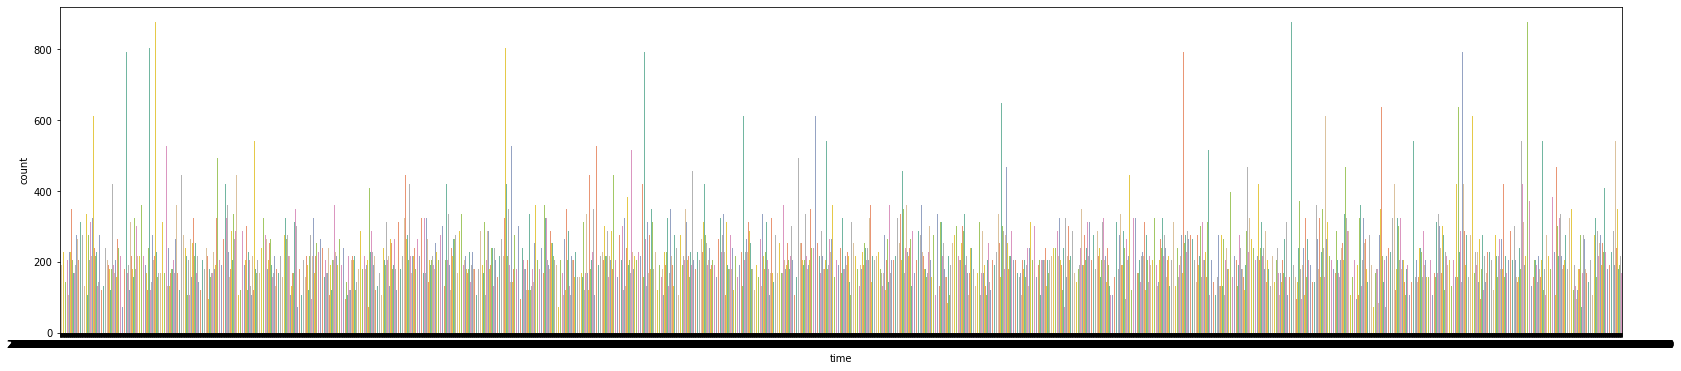

In [ ]:
# 시간별 quality 시각화 (전체)
plt.figure(figsize=(28,6))
ax = sns.countplot(data=train_quality, x='time', palette="Set2", order=train_problem["time"])

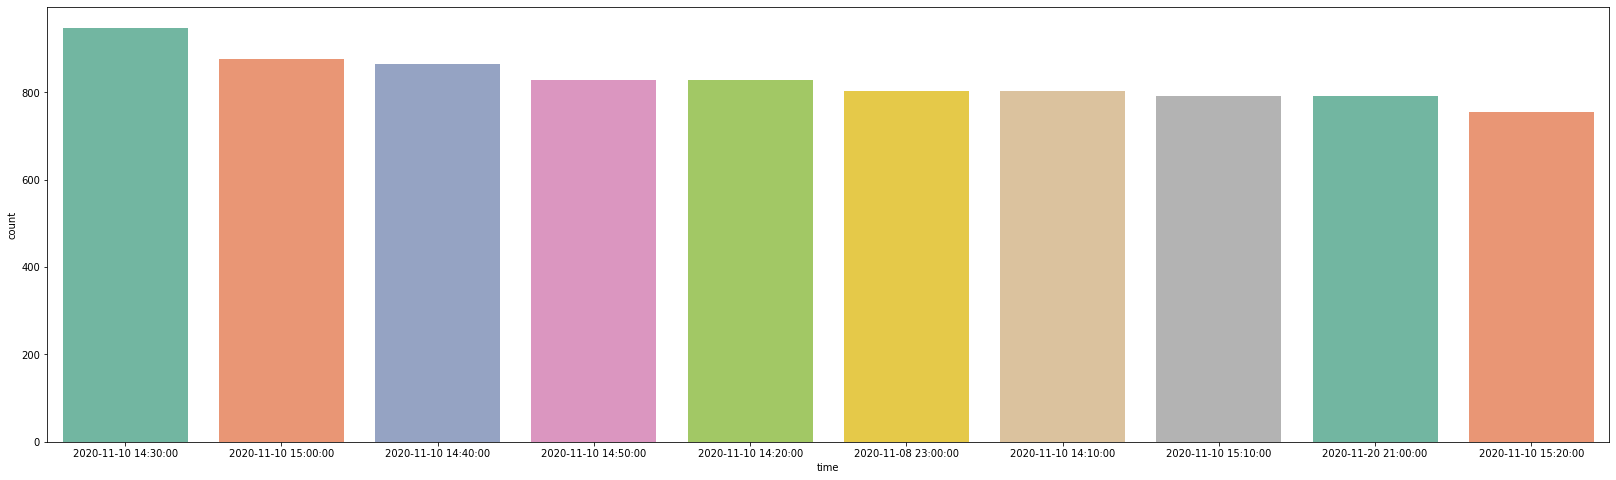

In [ ]:
# 시간별 quality 시각화 (상위 10개)
plt.figure(figsize=(28,8))
ax = sns.countplot(data=train_quality, x='time', palette="Set2", order=train_quality["time"].value_counts().index[:10])

quality 로그의 경우 11월10일에 가장 많이 발생했습니다.

## problem data 확인해보기

In [ ]:
train_problem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5429 entries, 0 to 5428
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5429 non-null   int64 
 1   user_id     5429 non-null   int64 
 2   time        5429 non-null   object
dtypes: int64(2), object(1)
memory usage: 127.4+ KB


In [ ]:
train_problem.head(10)

,Unnamed: 0,user_id,time
0,0,19224,2020-11-02 20:00:00
1,1,23664,2020-11-16 14:00:00
2,2,15166,2020-11-14 13:00:00
3,3,12590,2020-11-08 21:00:00
4,4,15932,2020-11-03 21:00:00
5,5,16852,2020-11-19 15:00:00
6,6,23427,2020-11-21 11:00:00
7,7,13507,2020-11-11 16:00:00
8,8,11274,2020-11-18 12:00:00
9,9,20610,2020-11-27 23:00:00


In [ ]:
train_problem["user_id"].nunique()

5000

In [ ]:
train_problem["time"].nunique()

488

In [ ]:
train_problem.time.max()

'2020-11-30 23:00:00'

In [ ]:
train_problem.time.min()

'2020-11-01 00:00:00'

### 불만접수를 한 고객은 5000명이며, problem data는 2020년 11월01일 00시00분 부터 2020년 11월30일 23시00분 까지의 데이터가 들어있습니다.

In [ ]:
# 결측치 확인
train_problem.isnull().sum()

Unnamed: 0    0
user_id       0
time          0
dtype: int64

결측치 없음.

In [ ]:
train_problem.user_id.max()    

24998

In [ ]:
train_quality.user_id.max()

24997

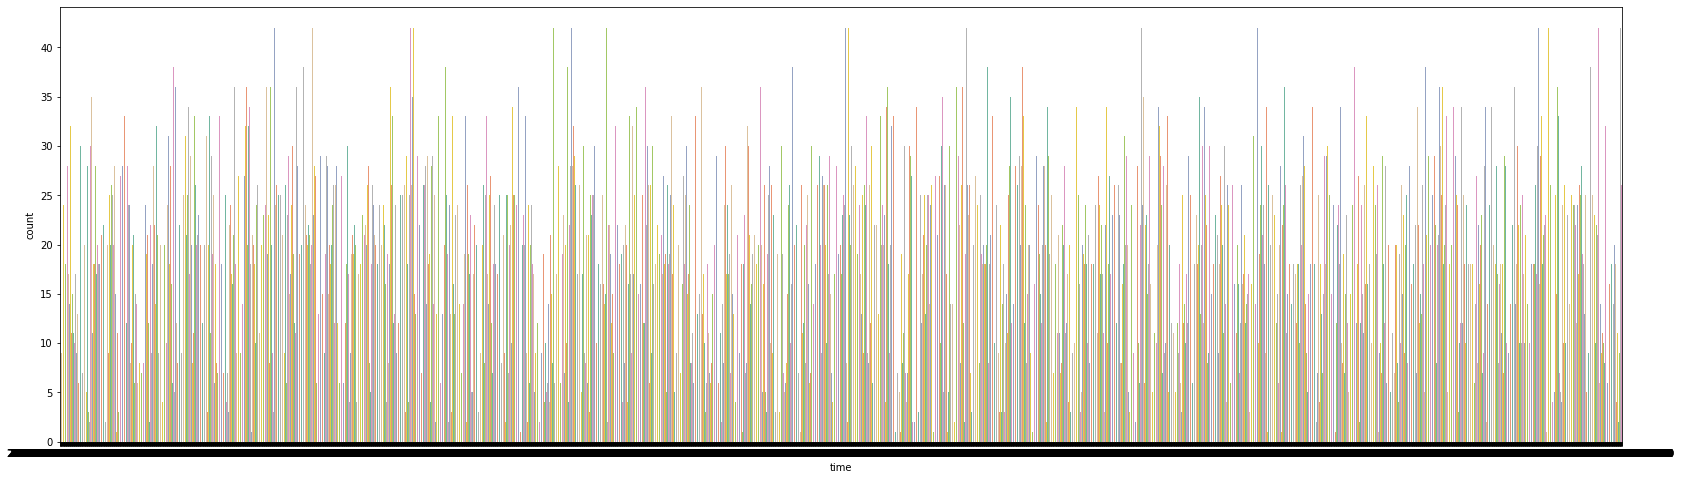

In [ ]:
# 시간별 불만접수 시각화 (전체)
plt.figure(figsize=(28,8))
ax = sns.countplot(data=train_problem, x='time', palette="Set2", order=train_problem["time"])

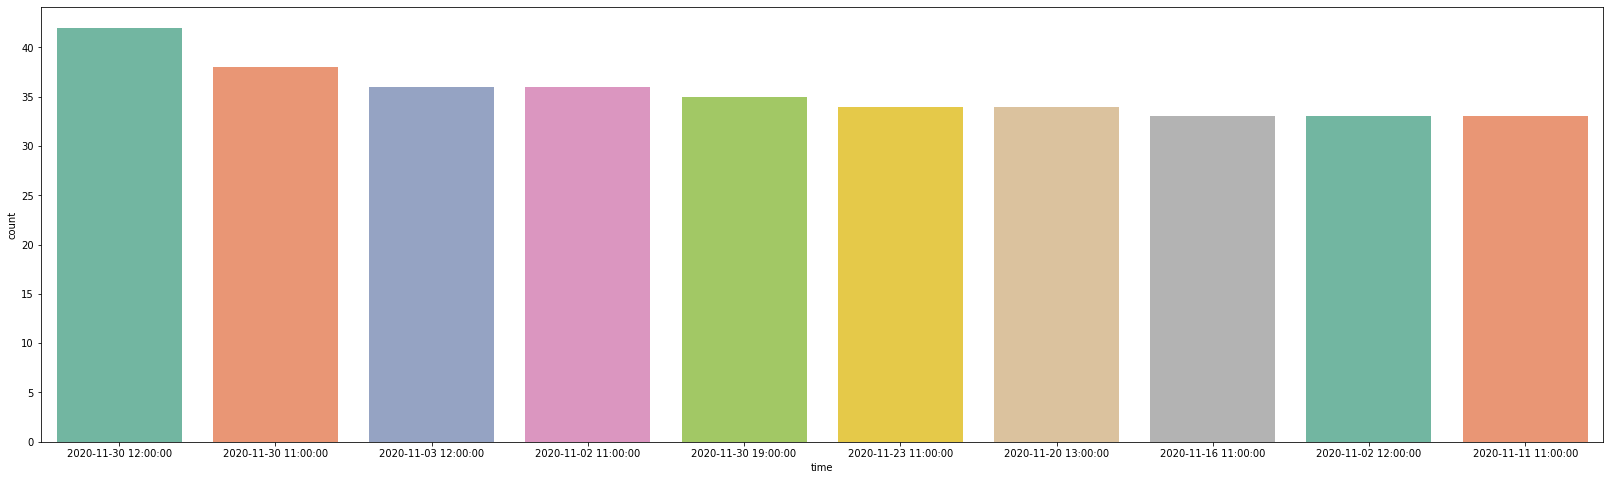

In [ ]:
# 시간별 불만접수 시각화 (상위 10개)
plt.figure(figsize=(28,8))
ax = sns.countplot(data=train_problem, x='time', palette="Set2", order=train_problem["time"].value_counts().index[:10])

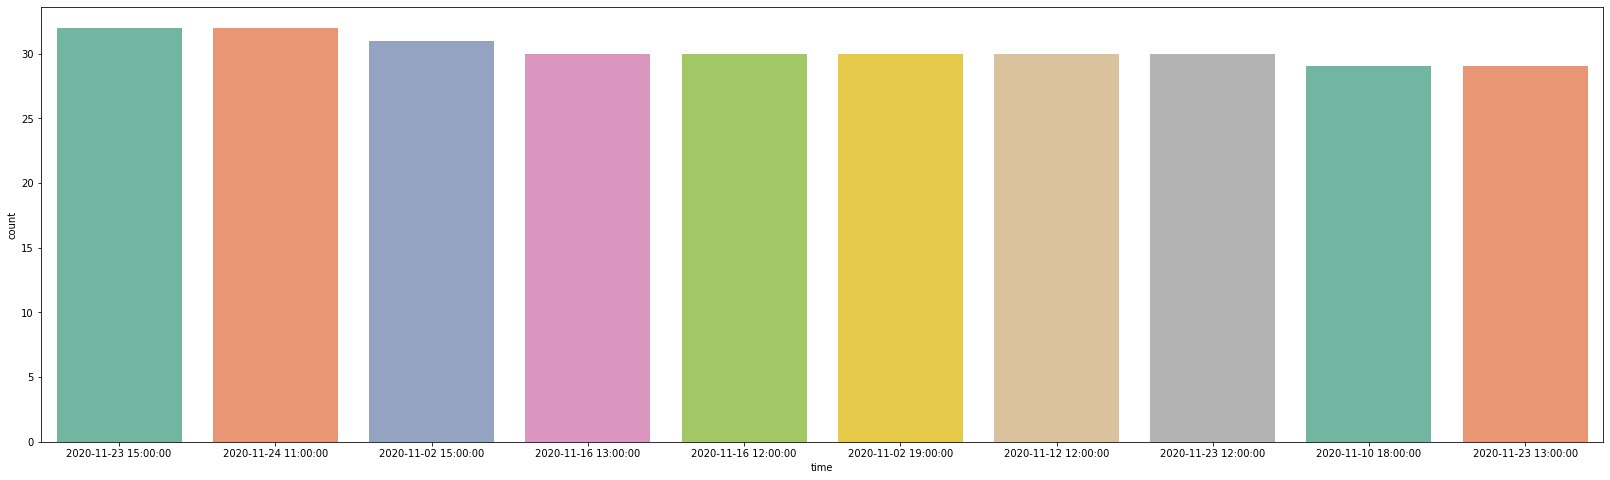

In [ ]:
# 시간별 불만접수 시각화 (상위 10~20개)
plt.figure(figsize=(28,8))
ax = sns.countplot(data=train_problem, x='time', palette="Set2", order=train_problem["time"].value_counts().index[10:20])

불만접수의 경우 11월30일에 가장 많이 발생하기는 했지만 어떤 날짜가 뚜렷하게 가장 많다고 하기는 어려울거 같습니다.

## error data 확인해보기

In [ ]:
train_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16554663 entries, 0 to 16554662
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Unnamed: 0  int64 
 1   user_id     int64 
 2   time        object
 3   model_nm    object
 4   fwver       object
 5   errtype     int64 
 6   errcode     object
dtypes: int64(3), object(4)
memory usage: 884.1+ MB


In [ ]:
train_error.head(10)

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
0,0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0
5,5,10000,2020-11-01 05:05:16,model_3,05.15.2138,26,1
6,6,10000,2020-11-01 05:05:22,model_3,05.15.2138,4,0
7,7,10000,2020-11-01 06:09:03,model_3,05.15.2138,15,1
8,8,10000,2020-11-01 17:47:54,model_3,05.15.2138,16,1
9,9,10000,2020-11-01 17:47:56,model_3,05.15.2138,4,0


In [ ]:
train_error.tail(10)

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
16554653,16554653,24999,2020-11-30 07:47:11,model_3,05.15.2138,4,0
16554654,16554654,24999,2020-11-30 14:21:05,model_3,05.15.2138,15,1
16554655,16554655,24999,2020-11-30 16:15:10,model_3,05.15.2138,16,1
16554656,16554656,24999,2020-11-30 16:15:11,model_3,05.15.2138,4,0
16554657,16554657,24999,2020-11-30 16:15:17,model_3,05.15.2138,4,0
16554658,16554658,24999,2020-11-30 16:30:51,model_3,05.15.2138,15,1
16554659,16554659,24999,2020-11-30 17:26:25,model_3,05.15.2138,16,1
16554660,16554660,24999,2020-11-30 17:26:25,model_3,05.15.2138,4,0
16554661,16554661,24999,2020-11-30 17:26:31,model_3,05.15.2138,4,0
16554662,16554662,24999,2020-11-30 21:06:25,model_3,05.15.2138,15,1


In [ ]:
train_error["user_id"].nunique()

15000

In [ ]:
train_error["time"].max()

'2020-12-02 18:51:52'

In [ ]:
train_error["time"].min()

'2020-10-31 23:59:59'

In [ ]:
train_error["model_nm"].nunique()

9

In [ ]:
train_error["fwver"].nunique()

37

In [ ]:
train_error["errtype"].nunique()

41

In [ ]:
train_error["errcode"].nunique()

2805

### error 발생을 경험한 고객은 15000명이며 error data는 2020년 10월31일 23시59분59초 부터 2020년 12월02일 18시51분52초 까지의 데이터입니다.  
### error가 발생한 model은 9개이고, 펌웨어는 37번 업데이트 되었으며, 발생한 error의 type은 41가지, errcode는 2805가지입니다.

In [ ]:
# 결측치 확인
train_error.isnull().sum()

Unnamed: 0    0
user_id       0
time          0
model_nm      0
fwver         0
errtype       0
errcode       1
dtype: int64

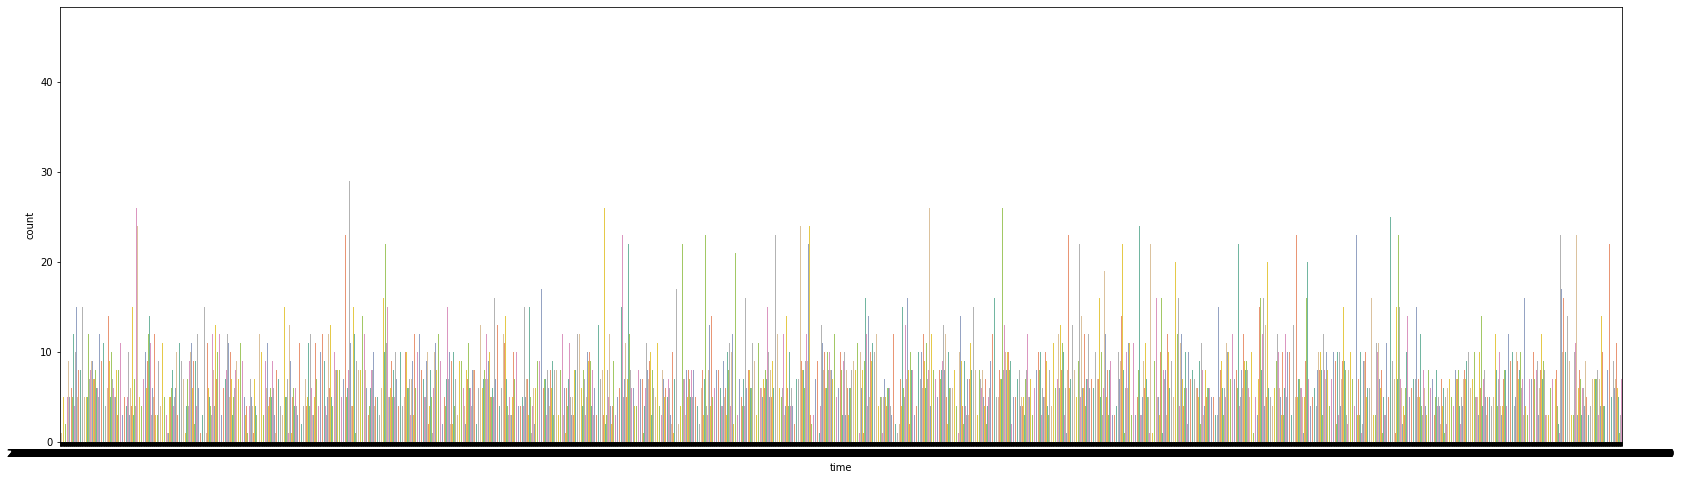

In [ ]:
# 시간별 에러발생 시각화 (전체)
plt.figure(figsize=(28,8))
ax = sns.countplot(data=train_error, x='time', palette="Set2", order=train_problem["time"])

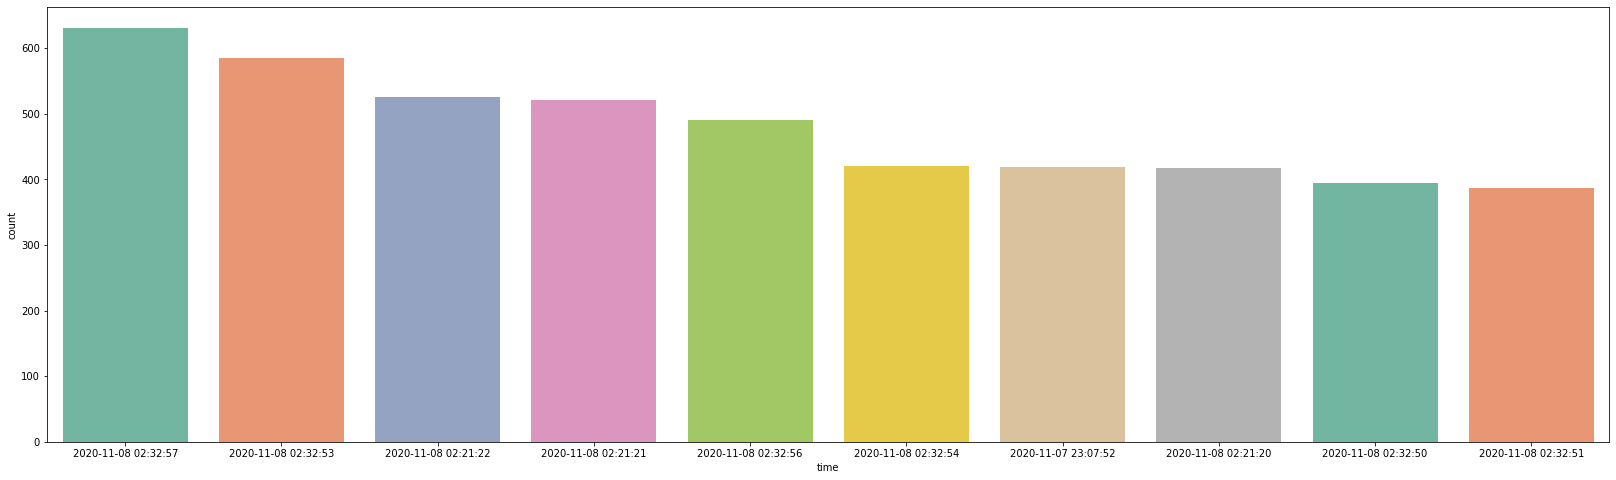

In [ ]:
# 시간별 에러발생 시각화 (상위 10개)
plt.figure(figsize=(28,8))
ax = sns.countplot(data=train_error, x='time', palette="Set2", order=train_error["time"].value_counts().index[:10])

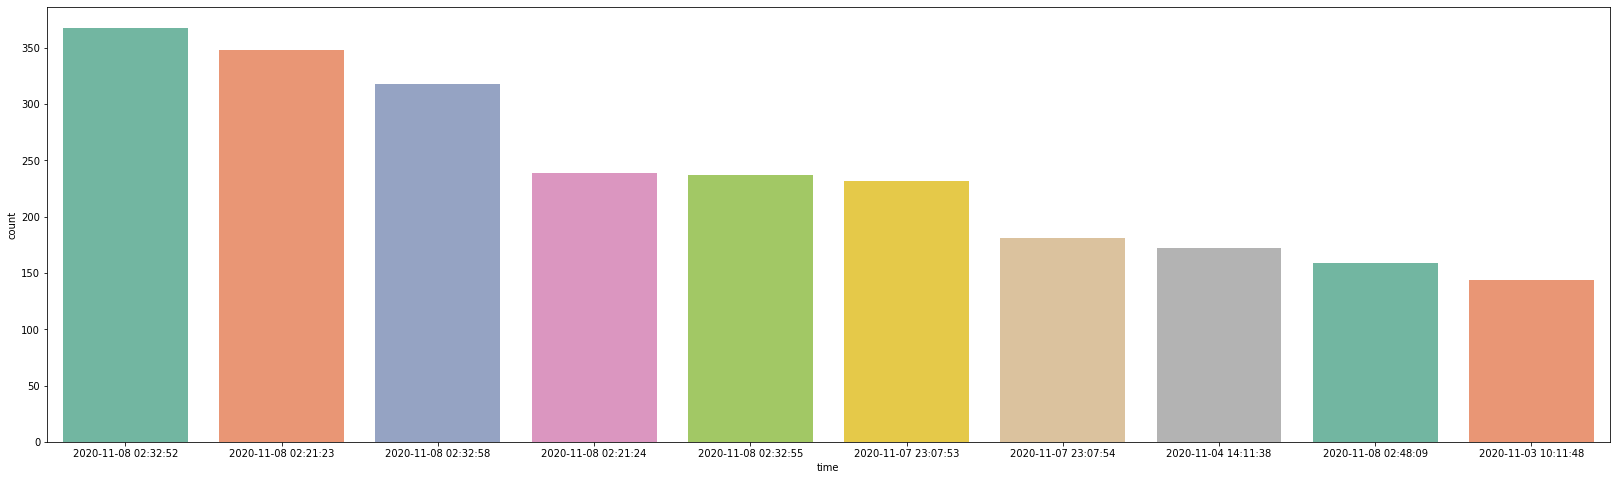

In [ ]:
# 시간별 에러발생 시각화 (상위 10~20개)
plt.figure(figsize=(28,8))
ax = sns.countplot(data=train_error, x='time', palette="Set2", order=train_error["time"].value_counts().index[10:20])

error 로그의 경우 11월 08일과 07일에 가장 많이 발생했습니다.

### quality data


In [ ]:
# quality 로그
new_train_quality = train_quality[['time','user_id']].drop_duplicates().reset_index(drop=True)

In [ ]:
new_train_quality.head()

,time,user_id
0,2020-11-29 09:00:00,10000
1,2020-11-30 21:00:00,10000
2,2020-11-04 11:00:00,10002
3,2020-11-06 01:00:00,10002
4,2020-11-11 01:00:00,10002


### problem data

In [ ]:
# problem 로그
problem_user = train_problem.user_id.unique()
new_problem_user = list(set(train_error.user_id.unique()) - set(problem_user))

In [ ]:
train_problem.head()

,Unnamed: 0,user_id,time
0,0,19224,2020-11-02 20:00:00
1,1,23664,2020-11-16 14:00:00
2,2,15166,2020-11-14 13:00:00
3,3,12590,2020-11-08 21:00:00
4,4,15932,2020-11-03 21:00:00


### error data


In [ ]:
train_error.head()

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
0,0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0


In [ ]:
train_error.model_nm.unique()

array(['model_3', 'model_2', 'model_0', 'model_1', 'model_7', 'model_4',
       'model_5', 'model_8', 'model_6'], dtype=object)

### 시각화 (데이터프레임 새로 생성 전)

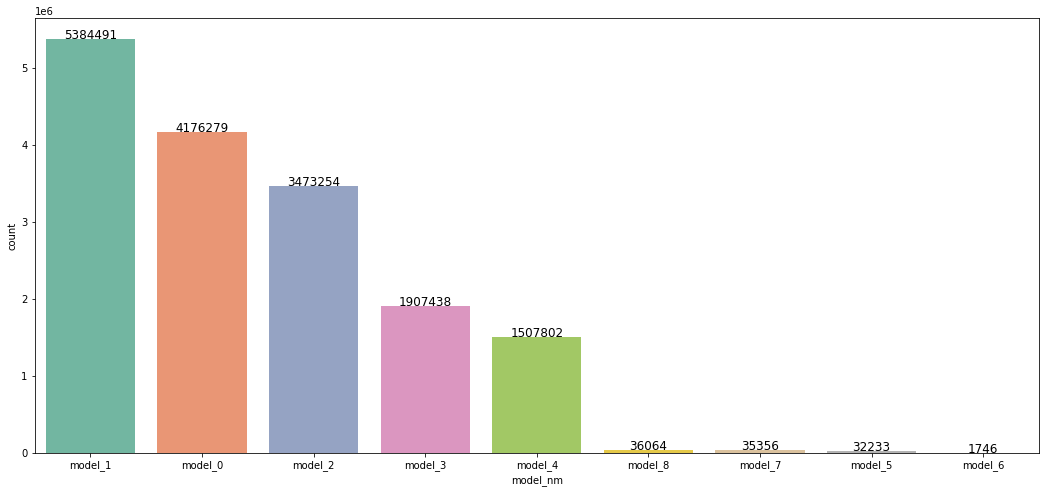

In [ ]:
# 모델별 에러발생 시각화
plt.figure(figsize=(18,8))
ax = sns.countplot(data=train_error, x='model_nm', palette="Set2", order=train_error["model_nm"].value_counts().index)
for p in ax.patches:
    height = int(round(p.get_height(), 0))
    ax.text(p.get_x() + p.get_width() / 2.,y=height+0.01,s= height, ha = 'center', size = 12)
plt.show()

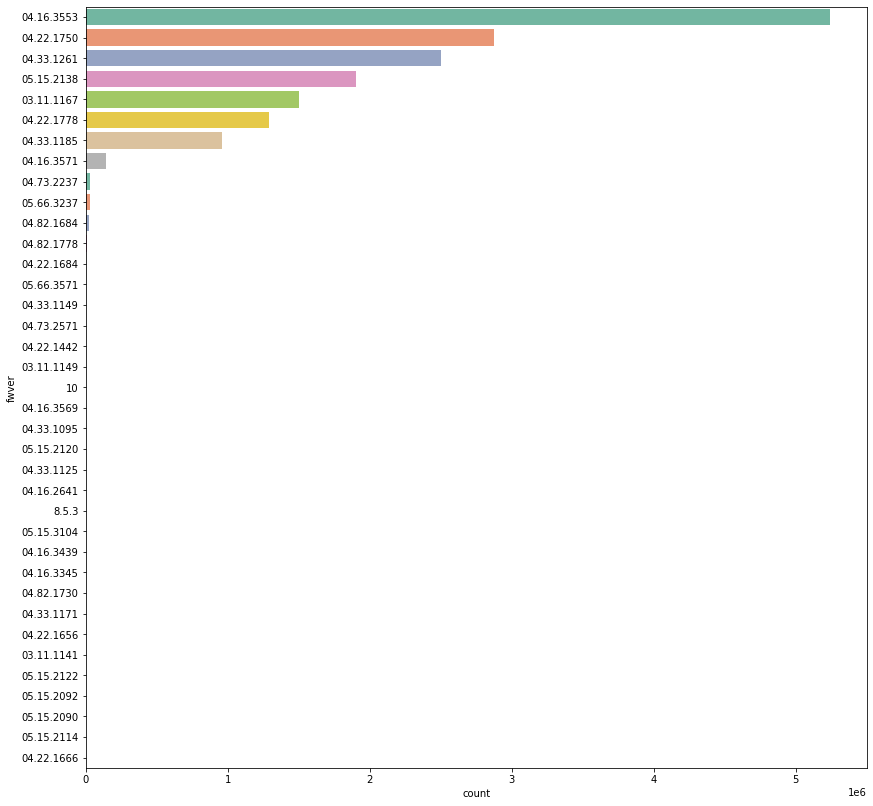

In [ ]:
# 펌웨어버전별 에러발생량 시각화
plt.figure(figsize=(14,14))
ax = sns.countplot(data=train_error, y='fwver', palette="Set2", order=train_error["fwver"].value_counts().index)

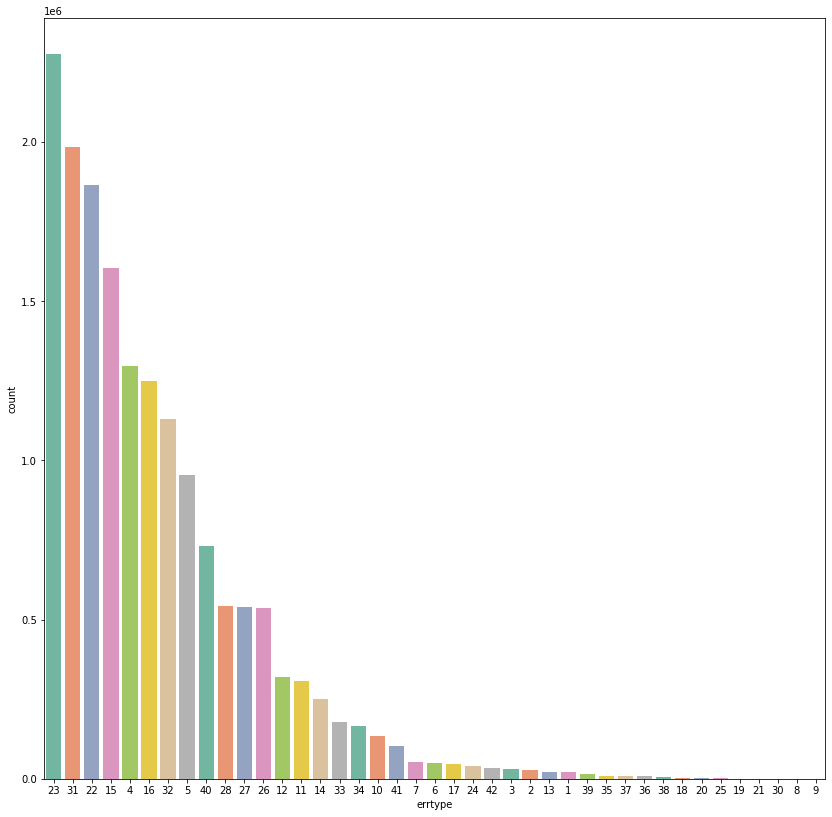

In [ ]:
# 에러타입별 발생량 시각화
plt.figure(figsize=(14,14))
ax = sns.countplot(data=train_error, x='errtype', palette="Set2", order=train_error["errtype"].value_counts().index)

In [ ]:
test_error.head()

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
0,0,30000,2020-11-01 03:02:27,model_1,04.16.3553,31,1
1,1,30000,2020-11-01 03:02:27,model_1,04.16.3553,33,2
2,2,30000,2020-11-01 03:02:28,model_1,04.16.3553,15,1
3,3,30000,2020-11-01 03:02:56,model_1,04.16.3553,22,1
4,4,30000,2020-11-01 03:03:00,model_1,04.16.3553,11,1


In [ ]:
test_error.model_nm.unique()

array(['model_1', 'model_2', 'model_3', 'model_0', 'model_4', 'model_5',
       'model_6', 'model_7', 'model_8'], dtype=object)

### 시각화(데이터프레임 새로 생성 후)
error data를 살펴보다보니 에러가 발생하는 모델과 펌웨어가 어느정도 정해져있다는거러 알게 되어서  
모델은 가장많이 발생한 5개, 펌웨어는 8개로 추려 데이터프레임을 새로 만들었습니다.  
아직은 error data만 살펴보았는데 추후 problem과 quality와의 접점을 잘 찾으면 유의미한 결과를 낼 수 도 있을 것 같습니다.

In [ ]:
# 에러가 가장 많이 발생한 5개의 모델만 가지고 dataframe을 다시 만들어봤습니다.
dferr = train_error.loc[(train_error['model_nm'] == 'model_0') | (train_error['model_nm'] == 'model_1') | (train_error['model_nm'] == 'model_2') | (train_error['model_nm'] == 'model_3') | (train_error['model_nm'] == 'model_4')]

In [ ]:
# 여기서 다시 에러발생이 가장 빈번한 8개의 fwver을 기준으로 dataframe을 다시 생성해봅니다.
dferr = dferr.loc[(dferr['fwver'] == '04.16.3553')|(dferr['fwver'] == '04.22.1750')|(dferr['fwver'] == '04.33.1261')|(dferr['fwver'] == '05.15.2138')|(dferr['fwver'] == '03.11.1167')|(dferr['fwver'] == '04.22.1778')|(dferr['fwver'] == '04.33.1185')|(dferr['fwver'] == '04.16.3571')]

In [ ]:
dferr.fwver.nunique()

8

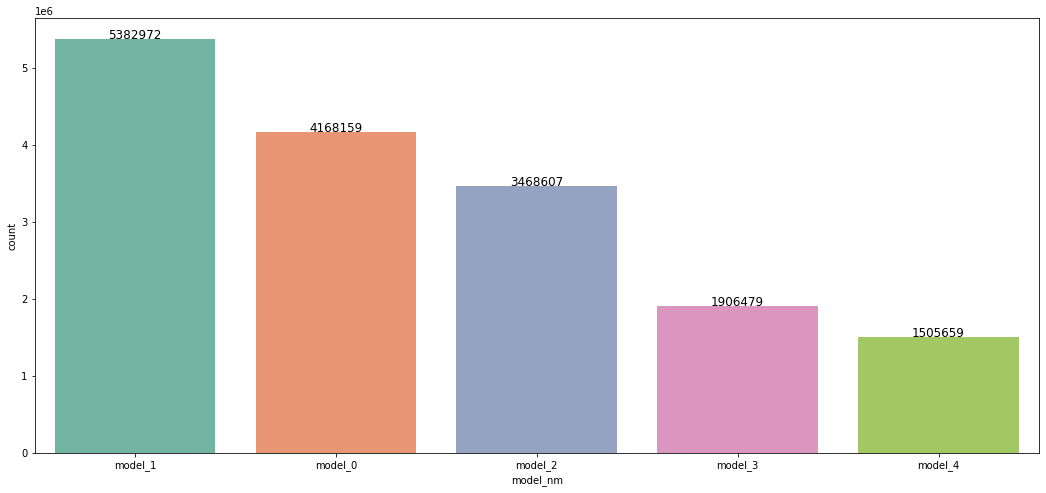

In [ ]:
# 모델별 에러발생 시각화2
plt.figure(figsize=(18,8))
ax = sns.countplot(data=dferr, x='model_nm', palette="Set2", order=dferr["model_nm"].value_counts().index)
for p in ax.patches:
    height = int(round(p.get_height(), 0))
    ax.text(p.get_x() + p.get_width() / 2.,y=height+0.01,s= height, ha = 'center', size = 12)
plt.show()

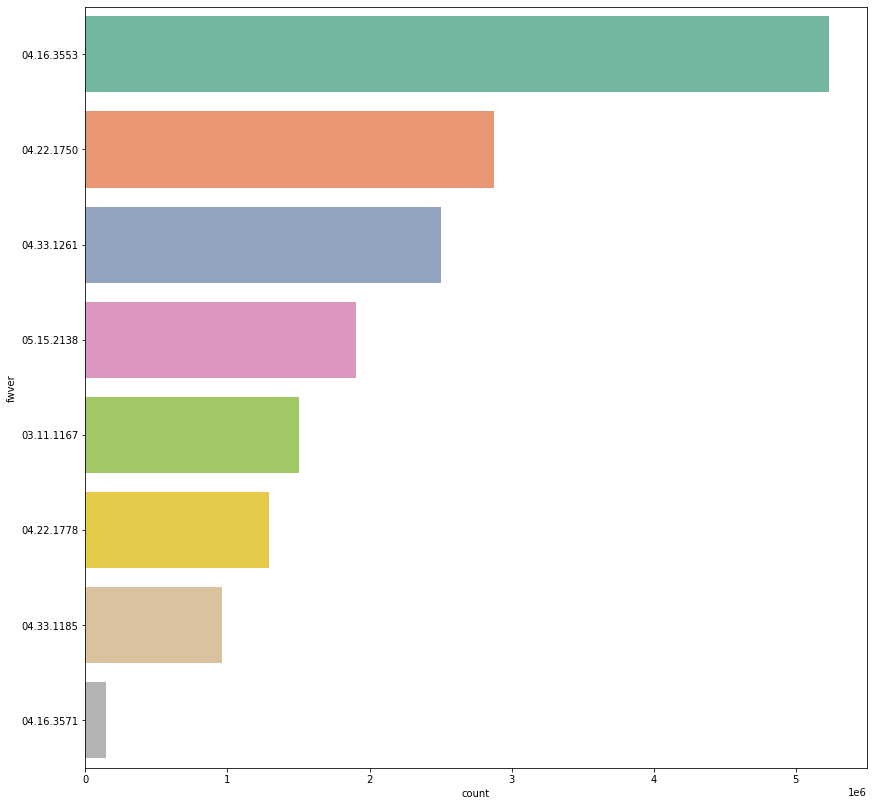

In [ ]:
# 펌웨어버전별 에러발생량 시각화2
plt.figure(figsize=(14,14))
ax = sns.countplot(data=dferr, y='fwver', palette="Set2", order=dferr["fwver"].value_counts().index)

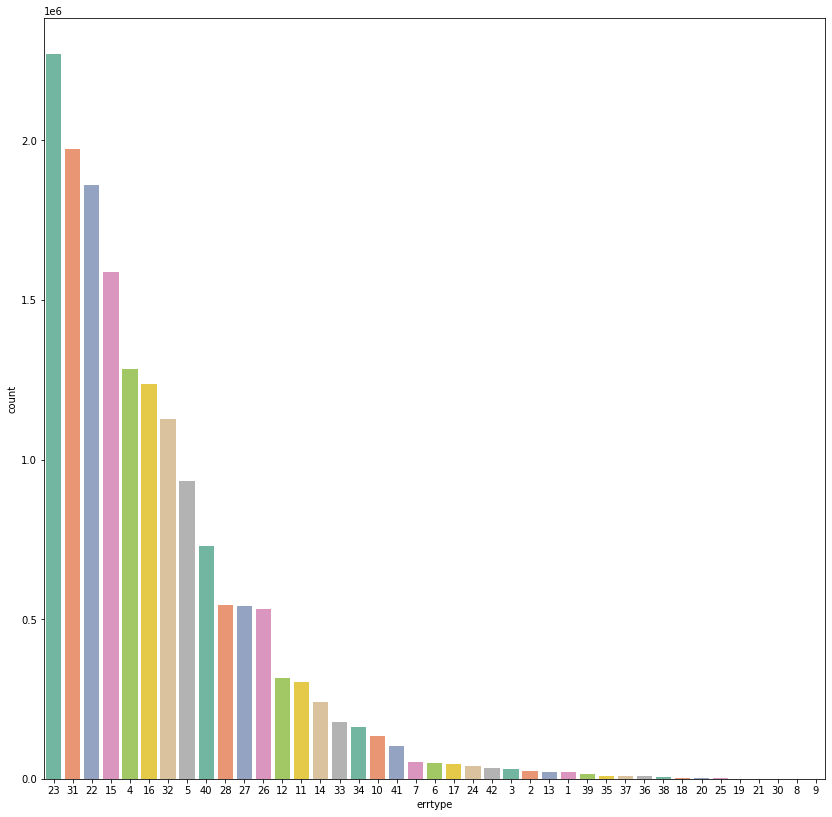

In [ ]:
# 새로 만든 dataframe으로 에러타입별 발생량 시각화
plt.figure(figsize=(14,14))
ax = sns.countplot(data=dferr, x='errtype', palette="Set2", order=train_error["errtype"].value_counts().index)

In [ ]:
dferr.head(10)

,Unnamed: 0,user_id,time,model_nm,fwver,errtype,errcode
0,0,10000,2020-11-01 02:56:16,model_3,05.15.2138,15,1
1,1,10000,2020-11-01 03:03:09,model_3,05.15.2138,12,1
2,2,10000,2020-11-01 03:03:09,model_3,05.15.2138,11,1
3,3,10000,2020-11-01 05:05:14,model_3,05.15.2138,16,1
4,4,10000,2020-11-01 05:05:15,model_3,05.15.2138,4,0
5,5,10000,2020-11-01 05:05:16,model_3,05.15.2138,26,1
6,6,10000,2020-11-01 05:05:22,model_3,05.15.2138,4,0
7,7,10000,2020-11-01 06:09:03,model_3,05.15.2138,15,1
8,8,10000,2020-11-01 17:47:54,model_3,05.15.2138,16,1
9,9,10000,2020-11-01 17:47:56,model_3,05.15.2138,4,0


In [ ]:
dferr.user_id.nunique()

14763

In [ ]:
dferr.time.max()

'2020-12-02 18:51:52'

In [ ]:
dferr.time.min()

'2020-10-31 23:59:59'

# Summary

### quality data의 time : 2020년 10월 31일 23:50 ~ 2020년 11월 29일 09:00
### problem data의 time : 2020년 11월 01일 00:00 ~ 2020년 11월 30일 23:00
### error data의 time : 2020년 10월 31일 23:59:59 ~ 2020년 12월 02일 18:51:52


# 모델링 (GradientBoosting)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

train_user_id_max = 24999
train_user_id_min = 10000
train_user_number = 15000

# train_error
id_error = train_error[['user_id', 'errtype']].values
error = np.zeros((15000,42))

for person_idx, err in tqdm(id_error):
    # person_idx -10000 위치에 person_idx, errtype에 해당하는 error값을 +1
    error[person_idx - 10000, err - 1] += 1

# train_problem
problem = np.zeros(15000)
problem[train_problem.user_id.unique()-10000] = 1

test_user_id_max = 44998
test_user_id_min = 30000
test_user_number = 14999

# test_error
id_error = test_error[['user_id','errtype']].values
x_test = np.zeros((test_user_number,42))
for person_idx, err in tqdm(id_error):
    # person_idx - test_user_id_min 위치에 person_idx, errtype에 해당하는 error값을 +1
    x_test[person_idx - test_user_id_min,err - 1] += 1
x_test = x_test.reshape(x_test.shape[0],-1)

x_train = error
y_train = problem

gb_clf = GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
gb_pred = gb_clf.predict(x_test)
# gb_acc = accuracy_score(y_test, gb_pred)

# print(f"모델 정확도 : {gb_acc :.4f}")

## GridSearchCV 이용해서 교차검증&최적의 파라미터 찾기
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[20,40],
    'learning_rate':[0.05, 0.1, 0.15]
}

grid_cv = GridSearchCV(gb_clf, param_grid=params,
                      n_jobs=-1, cv=2, verbose=1)
grid_cv.fit(x_train, y_train)
print("최적의 파라미터:", grid_cv.best_params_)
print("최고의 정확도 :", grid_cv.best_score_)

100%|██████████| 16532648/16532648 [00:43<00:00, 376977.43it/s]


Fitting 2 folds for each of 6 candidates, totalling 12 fits
최적의 파라미터: {'learning_rate': 0.15, 'n_estimators': 40}
최고의 정확도 : 0.7738666666666667
